# Breast Cancer Project
# Lymph Node Metastasis Prediction Using miRNA Expression Data

# Feature Selection 2nd Step

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif

## Import Function

In [2]:
def read_object(obj_path):
    with open(obj_path, 'rb') as input:
        return pickle.load(input)

def save_object(obj, dir_path, file_name, file_extension='pkl', create_dir=True):
    if create_dir:
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)
    name = os.path.normpath(os.path.join(dir_path, file_name+'.'+file_extension))
    with open(name, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        return name

In [6]:
dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/preprocessing/' 

file_name = 'Train Matrix.pkl'
train_matrix =read_object(dir_path+file_name)

file_name = 'Test Matrix.pkl'
test_matrix =read_object(dir_path+file_name)

file_name = 'Train Target.pkl'
train_target =read_object(dir_path+file_name)

file_name = 'Test Target.pkl'
test_target =read_object(dir_path+file_name)

dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/reading_breast_cancer/'

file_name = 'miRNA ID.pkl'
miRNA_id = read_object(dir_path + file_name)

dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/Feature_Selection (1st step)/' 

file_name = 'Selected Features (1st step).pkl'
miRNA_id_prime = read_object(dir_path + file_name)

In [7]:
train_samples_num = train_matrix.shape[0]
test_samples_num = test_matrix.shape[0]
features_num = len(miRNA_id_prime)
train_matrix_prime = np.zeros((train_samples_num, features_num))
test_matrix_prime = np.zeros((test_samples_num, features_num))
for i in range(features_num):
    index = np.argwhere(miRNA_id == miRNA_id_prime[i])
    train_matrix_prime[:,i] = train_matrix[:,index.item()]
    test_matrix_prime[:,i] = test_matrix[:,index.item()]

print(train_matrix_prime.shape)
print(test_matrix_prime.shape)

(492, 650)
(123, 650)


## Normalization 

In [8]:
scaler = MinMaxScaler()
scaler.fit(train_matrix_prime)
normal_train_matrix = scaler.transform(train_matrix_prime)
normal_test_matrix = scaler.transform(test_matrix_prime)

## Feature Selection
## Filter Methods 
## ANOVA

In [9]:
f_values, p_values = f_classif(normal_train_matrix, train_target)

In [10]:
f_values

array([1.60309054e-02, 8.54960775e-03, 2.23000044e-02, 2.33967972e-01,
       1.82318699e-01, 6.84054604e+00, 2.56400341e-02, 2.47755699e-01,
       4.22629610e-01, 5.07383106e+00, 1.11514060e+00, 3.02891918e-01,
       1.12547921e+00, 1.52385844e+00, 5.49896004e-01, 4.00283350e-01,
       9.92892492e-03, 1.35677248e+00, 1.04203367e+00, 1.01595463e+00,
       9.71758631e+00, 4.51458591e+00, 1.08306340e-01, 4.89770551e+00,
       1.00833889e+00, 1.02874262e+00, 5.99376700e-01, 1.06914689e-01,
       6.19144232e+00, 2.19125643e-01, 3.61508036e-01, 4.57785781e-02,
       1.40869834e+00, 9.95166905e-01, 5.23924070e-01, 1.04926665e+00,
       2.47517669e-01, 3.27994707e-04, 5.87942497e-01, 1.27826332e-02,
       6.49190136e-01, 3.00015585e-02, 9.12395168e-01, 7.21210302e+00,
       2.95406507e+00, 3.60957038e-01, 4.21777114e+00, 2.14023938e-01,
       3.11093222e-01, 6.61086069e+00, 1.43835544e-01, 2.63081914e+00,
       1.04580816e+00, 1.17265108e+00, 2.93379361e-01, 7.12040728e-05,
      

In [11]:
p_values

array([8.99298476e-01, 9.26367113e-01, 8.81353218e-01, 6.28813204e-01,
       6.69575663e-01, 9.18592085e-03, 8.72848550e-01, 6.18883111e-01,
       5.15932493e-01, 2.47313708e-02, 2.91487586e-01, 5.82325898e-01,
       2.89264309e-01, 2.17628202e-01, 4.58715447e-01, 5.27238085e-01,
       9.20667721e-01, 2.44664381e-01, 3.07852684e-01, 3.13977979e-01,
       1.93237883e-03, 3.41069314e-02, 7.42221259e-01, 2.73524670e-02,
       3.15796733e-01, 3.10954728e-01, 4.39189321e-01, 7.43824067e-01,
       1.31681070e-02, 6.39915087e-01, 5.47947944e-01, 8.30667805e-01,
       2.35847695e-01, 3.18975179e-01, 4.69517983e-01, 3.06181467e-01,
       6.19051589e-01, 9.85557974e-01, 4.43585110e-01, 9.10029047e-01,
       4.20793201e-01, 8.62558220e-01, 3.39950701e-01, 7.48700368e-03,
       8.62934566e-02, 5.48252996e-01, 4.05327902e-02, 6.43836969e-01,
       5.77264835e-01, 1.04297971e-02, 7.04661643e-01, 1.05450845e-01,
       3.06979094e-01, 2.79389768e-01, 5.88309243e-01, 9.93270764e-01,
      

In [12]:
print(f_values.shape)
print(p_values.shape)

(650,)
(650,)


In [13]:
sorted_f_values = np.flip(np.sort(f_values))
selected_num = 400 
selected_index = np.zeros(selected_num, dtype=np.int32)
for i in range(selected_num):
    index = np.argwhere(f_values == sorted_f_values[i])
    selected_index[i] = index.item()

selected_train_matrix = normal_train_matrix[:,selected_index]
selected_test_matrix = normal_test_matrix[:,selected_index]
selected_miRNA_id = miRNA_id_prime[selected_index]
print(selected_train_matrix.shape)
print(selected_test_matrix.shape)
print(selected_miRNA_id.shape)

(492, 400)
(123, 400)
(400,)


## PCA and Visualization

In [14]:
pca = PCA(n_components=2)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(492, 2)
(123, 2)


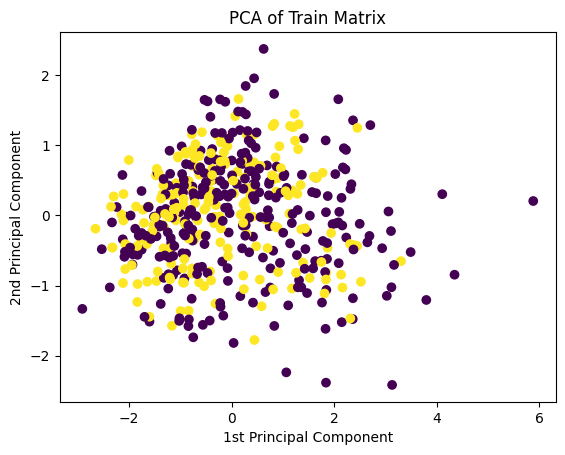

In [15]:
plt.Figure(figsize=(10,10))
fig = plt.scatter(train_pca_matrix[:,0], train_pca_matrix[:,1], c=train_target)
plt.title('PCA of Train Matrix')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

## Classifying based on the PCA Data Matrix

In [16]:
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(492, 300)
(123, 300)


f:\vscode\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
f:\vscode\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


--------------------------------------------------
Training set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       206

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



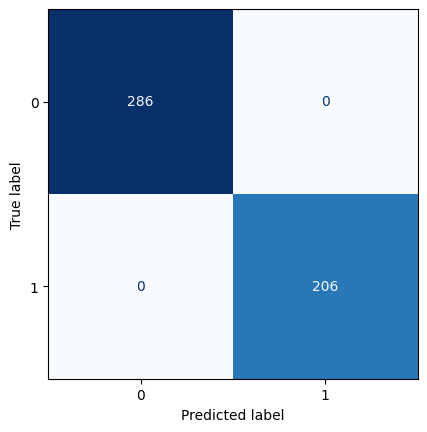

--------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        71
           1       0.42      0.42      0.42        52

    accuracy                           0.51       123
   macro avg       0.50      0.50      0.50       123
weighted avg       0.51      0.51      0.51       123



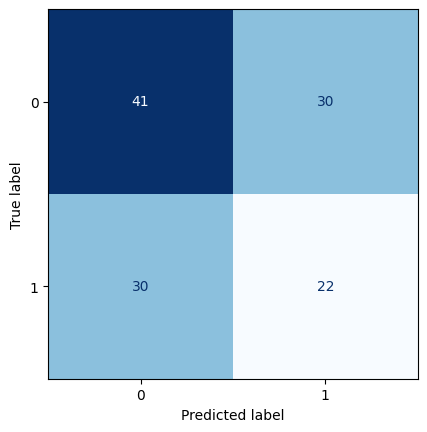

In [ ]:
model = LinearDiscriminantAnalysis()
#model = QuadraticDiscriminantAnalysis()
# model = GaussianNB()
model.fit(train_pca_matrix, train_target)
train_pred = model.predict(train_pca_matrix)
test_pred = model.predict(test_pca_matrix)
print('-'*50)
print('Training set')
print(classification_report(train_target, train_pred))

ConfusionMatrixDisplay.from_predictions(train_target, train_pred, cmap='Blues', colorbar=False)
plt.show()

print('-'*50)
print('Test set')
print(classification_report(test_target, test_pred))
ConfusionMatrixDisplay.from_predictions(test_target, test_pred, cmap='Blues', colorbar=False)
plt.show()

## Saving Result

In [19]:
dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/Feature_Selection (2nd step)/' 
file_name = 'Selected Features (2nd step)'
save_object(selected_miRNA_id, dir_path, file_name)

'F:\\internship\\Breast Cancer Project (Lymph Node Metastasis)(miRNA)\\Feature_Selection (2nd step)\\Selected Features (2nd step).pkl'